<a href="https://colab.research.google.com/github/jugernaut/MACTI-programacionparalelo/blob/main/05_RedesNeuronales/06_SolucionEcuacionesNoLineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Ecuaciones no lineales</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Angel Pérez León.</i></h5>
    <h5 align="center"><i>Diana Laura Rojas Cristino.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico.</i></h5>
  </font>

## Introducción

Las ecuaciones no lineales se presentan en muchos fenómenos de la ciencia y la sociedad, como lo son:

* Economía.
* Demografía.
* Clima.
* Biología, entre otros.

Una ecuación no lineal es toda aquella en la que cualquiera de las variables que forman parte de la ecuación no son de primer grado. Por tanto en este tipo de ecuaciones nos podemos encontrar polinomios de segundo grado, raíces, logaritmos, exponenciales, funciones trigonométricas, etc.

Los métodos numéricos que se tratan en esta sección sirven para generar aproximaciones a las soluciones de este tipo de ecuaciones (no lineales), cuando no es posible obtener soluciones exactas o que es muy complicado encontrarlas con métodos algebraicos.

El objetivo principal de este tema será aplicar algunos métodos numéricos para hallar raíces reales de ecuaciones no lineales de una variable, que satisfacen a una ecuación del tipo: $f(x)=0$

• Los valores que hacen que una función $f(x)=0$ , se conocen con el nombre de raíces o ceros de $f$.

• Se analizarán los siguientes métodos, por medio de los cuales se obtendrá un valor $x_{n}$ tal que:

$$ x_{n} \approx x \hspace{2mm}\left( x_{n} \hspace{1mm} \text{es la aproximación en la iteración n} \right) $$

$$ f(x_{n}) \approx 0 \hspace{2mm} \left( f(x_{n}) \hspace{1mm} \text{es el valor de $f$ evaluado en} \hspace{1mm} x_{n} \right)$$

## Categorías de métodos

Los métodos para encontrar solución a ecuaciones no lineales los podemos clasificar en 2 categorías.


*   **Métodos cerrados**: requieren dos valores iniciales $x_{0}$ y $x_{1}$, que deben encerrar a la raíz.

    *   Método de la bisección.

    *  Método de la falsa posición.


* **Métodos abiertos**: requieren un sólo valor de inicio $x_{0}$ o dos de ellos $x_{0}$ y $x_{1}$ , pero que no necesariamente deben encerrar a la raíz.

    * Método de la secante.

    * Método de Newton.
    
    
Los métodos numéricos se basan en **iteraciones que generan sucesiones**, lo que significa que dada una aproximación inicial $x_{0}$ se emplea esta para encontrar el siguiente valor de $x_{1}$ de tal manera que para encontrar el valor de la solución final $x_{n}$ es necesario emplear $x_{n-1}$ para calcular dicho valor.

Cabe mencionar que no existe un método universal para encontrar solución a ecuaciones no lineales. Algunos de ellos funcionarán sobre ciertos critérios y no servirán para resolver todo tipo de ecuación. Los métodos que presenten un buen comportamiento sobre alguna ecuación pueden no ser los mejores para resolver otro tipo de ecuaciones.

De cada uno de los métodos vistos en esta sección (y de todos los métodos numéricos en general), es importante conocer sus ventajas y desventajas, así como su **complejidad computacional, crecimiento del error y rapidez de convergencia**.

Ya se que se tenga una idea de las cualidades específicas de cada método, es más sencillo determinar cual de ellos aplicar y bajo que circunstancias.

## Método de la bisección

El problema de encontrar una aproximación a la raíz de una ecuación data del año 1700 a.c. Una tabla cuneiforme encontrada en Babilonia muestra el número sexagesimal (base 60) equivalente a 1.414222 como aproximación de $\sqrt{2}$, resultado con una precisión de $10^{-5}$. Esta aproximación se puede encontrar empleando el algoritmo visto al inicio del curso.

El primer método numérico que analizaremos y que se basa en el teorema del valor medio, se conoce como el método de la bisección o búsqueda binaria.

### Teorema del valor Intermedio

Sea $f$ una función continua en un intervalo $[a,b]$. Entonces para cada $u$ tal que $f(a) < u < f(b) $ , existe al menos un $c \in ( a, b) $ tal que $f(c)=u$.

El teorea de valor intermdio, origina un resultado que nos ayudará a entender el método de la bisección, el resultado es el siguiente.

### Teorema de Bolzano

Sea $f$ una función continua en un intervalo $[a,b]$ con $f(a)$ y $ f(b) $  de signos contrarios, es decir, $f(a)*f(b)<0 $ . Entonces existe al menos un $c \in ( a, b) $ tal que $f(c)=0$.

### Descripción del método

* Para simplificar, asumimos que $[a,b]$ contiene exactamente una raíz $x$, (aunque el método también se puede aplicar cuando hay mas de una raíz en $[a,b]$; pero cuando esto sucede no se garantiza que el método sea convergente a la solución buscada.

* El método consiste en dividir sucesivamente el intervalo $[a,b]$ por la mitad y evaluar ese punto para saber si se tiene una raíz o en su defecto hasta que la longitud del intervalo tienda a cero.

* Un prerequisito para garantizar la convergencia de este método es garantizar que $f$ es continua en $[a,b]$ y que en este intervalo se encuentra exactamente una raíz; si se cumplen ambos se garantiza convergencia, pero no significa que si uno de ellos no se cumple, el método sea divergente.


### Algoritmo

1. Se calcula la primera iteración $(n=1)$ el punto medio del intervalo, que será la primera aproximación de la raíz, este valor esta dado por:

$$x_{1}=a+\frac{b-a}{2}=\frac{2a+b-a}{2}=\frac{a+b}{2}$$

* Para obtener el n-esimo punto medio, la ecuación sería:

$$x_{n}=\frac{a_{n-1}+b_{n-1}}{2} \tag{1}$$

A la ecuación (1) se le denomina método iterativo del punto medio, actualizando iterativamente los valores de $a$ y $b$.

2. Se verifican los signos de $f(a)*f(x_{n})$ y $f(x_{n})*f(b)$, para saber en que subintervalo se encuentra la raíz:

    *  Si $f(a)*f(x_{n})<0$, entonces en el subintervalo $[a,x_{n}]$ se encuentra la raíz, renombrando $a=a$ y $b=x_{n}$.

    * Si $f(a)*f(x_{n})>0$, entonces en el subintervalo $[x_{n},b]$ se encuentra la raíz, renombrando $a=x_{n}$ y $b=b$.
    * Si $f(a)*f(x_{n})=0$, entonces $x_{n}$ es la raíz. Debido a los errores de redondeo, es poco probable que $f(x_{n})=0$ , por lo que se deben de utilizar otros criterios para saber cuando detener el algoritmo.
    
**Tolerancia**

Si ocurre alguno de los dos primeros casos $(f(a)*f(x_{n})<0$,$ \hspace{1mm} f(a)*f(x_{n})>0 )$ se calcula para la segunda iteración el punto medio del nuevo intervalo mediante la ecuación (1), siendo esta la aproximación mas actualizada de la raíz.

Se repite el proceso hasta que se cumplan los siguientes criterios de convergencia.

$$ \left|x_{n}-x_{n-1}\right|\leq Tol \tag{2} $$

$$ \left|f(x_{n})\right|\leq Tol \tag{3} $$

$$ N<n \tag{4} $$

Donde $Tol$ es alguna tolerancia definida $>0$ y $N$ es un número máximo de iteraciones.

Se deben cumplir simultáneamente los criterios (2) y (3) para asegurar que se ha encontrado una aproximación de la raíz. En su defecto se debe cumplir el criterio (4) el cual indica que no se ha logrado la convergencia.

**Pseudocódigo**

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/raicesNumericas/algbic.PNG?raw=1" width="700">

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/raicesNumericas/esqbis.PNG?raw=1" width="700">

In [ ]:
'''Esta funcion implementa el metodo de la biseccion
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
a:   limite inferior del rango inicial
b:   limite superior del rango inicial
'''
def biseccion(f,Tol,N,a,b):
    sucesion=[]
    fa, fb = f(a), f(b)
    #no hay un cambio de signo (teorema del valor medio)
    #no existe raiz en el intervalo [a,b]
    if fa*fb>0:
        print ("no hay raiz en [a,b]")
        return
    #contador de iteraciones
    n=1
    x0=0.0
    #mientras no se exceda el numero de iteraciones
    while n<=N:
        #se busca la raiz en el punto medio
        x1=(a+b)/2.0
        fx=f(x1)
        sucesion.append(x1)
        #en caso de que la iteracion siguiente y la diferencia
        #entre la iteracion anterior no excedan Tol, entonces
        #la iteracion actual se aproxima a la solucion buscada
        if abs(f(x1)) <= Tol and abs(x1-x0) <= Tol:
            return x1, sucesion
        #en caso de no cumplir el criterio de tolerancia
        #se actualiza el rango de busqueda
        if (fa*fx <0.0):
            b=x1
        if (fx*fa >0.0):
            a=x1
        x0=x1
        #se incrementa el contador de iteraciones
        n=n+1

def f(x):
  return (x**2)-1

raiz, sus = biseccion(f,0.001,1000,-0.5,2)
print("La raíz con el método de la bisección es:", raiz)

La raíz con el método de la bisección es: 0.9996337890625


En el siguiente interactivo se muestra la gráfica correspondiente a $f(x)$, si quieres ver el codigo de esta gráfica da click [aquí](https://colab.research.google.com/github/jugernaut/Numerico2021/blob/master/02_EcuacionesNoLineales/Biseccion_interactive.ipynb).

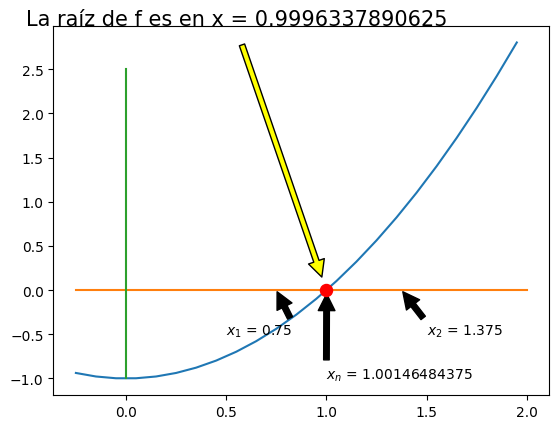

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# funcion a graficar y de la cual se busca la raiz
def f(x):
  return (x**2)-1

x = np.arange(-0.25, 2, 0.1)
fx = [f(i) for i in x]
raiz,sucesion = biseccion(f,0.001,1000,-0.5,2)

fig, graf = plt.subplots()
#funcion a grficar
graf.plot(x,fx)
#ejes
graf.plot([-0.25, 2], [0, 0])
graf.plot([0, 0], [-1, 2.5])

# iteracion 1
graf.annotate('$x_1$ = '+str(sucesion[0]), xy=(sucesion[0], 0), xytext=(0.5,-0.5),
              arrowprops=dict(facecolor='black', shrink=0.05))

# iteracion 2
graf.annotate('$x_2$ = '+str(sucesion[1]), xy=(sucesion[1], 0), xytext=(1.5,-0.5),
              arrowprops=dict(facecolor='black', shrink=0.05))
# iteracion n
graf.annotate('$x_n$ = '+str(sucesion[-3]), xy=(sucesion[-3], 0), xytext=(1.0,-1.0),
              arrowprops=dict(facecolor='black', shrink=0.05))

graf.scatter([raiz],[0.], c='red',marker='o',s=75, zorder=5)
graf.annotate('La raíz de f es en x = '+str(raiz), xy=(raiz, 0), xytext=(-0.5,3.0),
              fontsize=15, arrowprops=dict(facecolor='yellow', shrink=0.05))

plt.show()

interactive(children=(IntSlider(value=1, description='iteraciones', max=10), Output()), _dom_classes=('widget-…

<function __main__.falsaGraf(iteraciones)>

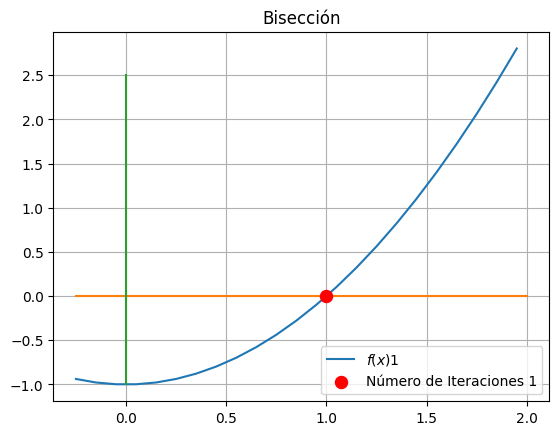

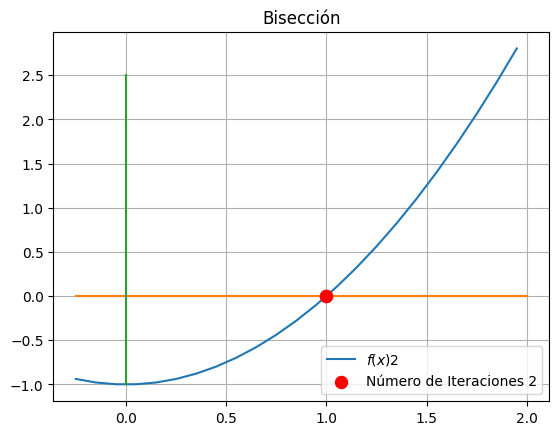

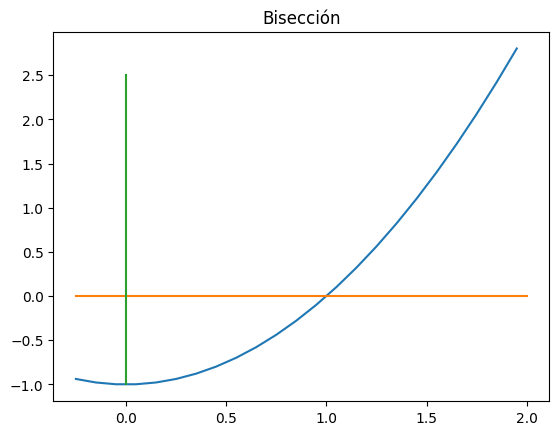

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

# funcion a graficar y de la cual se busca la raiz
def f(x):
  return (x**2)-1

def falsaGraf(iteraciones):
  # dominio en el cual se genera la grafica
  x = np.arange(-0.25, 2, 0.1)
  fx = [f(i) for i in x]
  raiz,sucesion = biseccion(f,0.001,1000,0,2)
  fig, graf = plt.subplots()
  #funcion a grficar
  plt.title('Bisección')
  plt.plot(x,fx, label = "$f(x)$"+str(iteraciones))
  #ejes
  plt.plot([-0.25, 2], [0, 0])
  plt.plot([0, 0], [-1, 2.5])
  # constante para acotar
  plt.scatter(sucesion[:iteraciones], [0]*iteraciones, c='red',marker='o',s=75, zorder=5,
              label = "Número de Iteraciones "+str(iteraciones))
  plt.grid()
  plt.legend()

interact(falsaGraf, iteraciones=widgets.IntSlider(min=0,max=10,step=1,value=1))

### Análisis de Convergencia

**Teorema:**

Si $f$ es una función continua definida en el intervalo $[a,b]$, y se satisface $f(a)*f(b)<0$. El método de bisección genera una sucesión $\left\{ x_{n}\right\} _{n=1}^{\infty}$ que aproxima una raíz $x$ de $f$, tal que:  
$$\left|x-x_{n}\right|\leq\frac{b-a}{2^{n}}\leq Tol,\quad para\,n \geq 1 $$

*Demostración:*

 Para cada $n \geq 1$, tenemos

 $$b_{n}-a_{n}=\frac{1}{2^{n-1}}(b-a)\quad y\quad x\in(a_{n},b_{n})$$.

 Y como $x_{n}=\frac{1}{2}(a_{n}+b_{n})$ para toda $n \geq 1$, se deduce que

 $$\left|x-x_{n}\right|\leq\frac{1}{2}(b_{n}-a_{n})=\frac{1}{2}\left(\frac{1}{2^{n-1}}(b-a)\right)=\frac{b-a}{2^{n}}$$

Por lo tanto

$$\left|x-x_{n}\right|\leq\frac{b-a}{2^{n}} $$

Por otro lado, queremos que la distancia entre $x$ y $x_n$ sea menor o igual que la Tolerancia. Pero ya vimos que esa distancia esta acotada por $\frac{b-a}{2^{n}}$, de tal forma que

$$ \frac{b-a}{2^{n}} \leq Tol$$

$$\therefore \left|x-x_{n}\right|\leq\frac{b-a}{2^{n}}\leq Tol,\quad para\,n \geq 1 $$

**¿Cuantas iteraciones?**.

Para conocer cuantas iteraciones son necesarias considerando que *Tol* ya fue preestablecido, basta con resolver la desigualdad para $n$ del teorema anterior. Lo que nos da como resultado.

$$\Longrightarrow \frac{b-a}{2^{n}} \leq Tol$$

$$ b-a \leq 2^{n}Tol $$

$$ \frac{b-a}{Tol} \leq 2^{n} $$

$$ log\left(\frac{b-a}{Tol}\right) \leq \log2^{n}$$

$$ log\left(\frac{b-a}{Tol}\right) \leq n\log2 $$

$$ \frac{\log\left(\frac{b-a}{Tol}\right)}{\log2} \leq n $$

$$ \therefore N > \frac{\log\left(\frac{b-a}{Tol}\right)}{\log2}$$

Es importante recalcar que a pesar de que este resultado nos da una idea de la cota para el número de iteraciones ($N$), en realidad se tienen que realizar más iteraciones, debido a que para que el algoritmo termine es necesario cumplir ambos criterios señalados previamente.


### Análisis de Complejidad

Por otro lado podemos notar que $n$ es el número mínimo de iteraciones que requiere este algoritmo, en otras palabras, $n$ es el número de operaciones que requiere este algoritmo para lograr la convergencia a la raíz buscada.

$$n \geq \frac{\log\left(\frac{b-a}{Tol}\right)}{\log2}$$

$$\Longrightarrow \frac{\log\left(\frac{b-a}{Tol}\right)}{\log2} = \log_{2}(\frac{b-a}{Tol})$$

$$ \therefore n \geq \log_{2}(\frac{b-a}{Tol})$$

De tal manera que $\log_{2}(\frac{b-a}{Tol})$ es la cota inferior para el número de operaciones que requiere este algoritmo. Este valor nos da una idea cuál función podría acotar superiormente el número de operaciones de este algoritmo.

Además se puede notar que este algoritmo funciona de manera similar al algoritmo conocido como **búsqueda binaria**, mismo que pertenece al orden logarítmico, es decir  $T(n) \in O(log\,n)$ donde $T(n)$ es el número de operaciones que le toma al algoritmo búsqueda binaria encontrar un valor en términos de $n$

Así que todo indica que el método de la bisección también pertenece a $O(log\,n)$, sin embargo, para ser formales hace falta demostrarlo.

### Ventajas y Desventajas

**Ventajas**.

* Encuentra una raíz aún cuando la función no sea analítica.

* Si existe una raíz, este método siempre converge.

* Es de los métodos mas sencillos de programar.

**Desventajas**.

* Su convergencia es muy lenta comparada con la convergencia de otros métodos, por lo que se sugiere escoger un intervalo inicial $[a,b]$, tan pequeño como sea posible.

* Es mandatario, encontrar un intervalo donde exista al menos una raíz.

## Método de la falsa posición

El método de la falsa posición debe su nombre a que búsca una raíz de la funcion $f(x)$ a partir de una falsa posición.

Esta **falsa posición** viene de encontrar una recta secante de $f(x)$ y calcular la intersección de esta recta con el eje de las $x$ para así suponer que en esa intersección (falsa posición) se encuentra la raíz.

### Descripción del método

* Comienza con un intervalo $[a,b]$, que encierra a la raíz, es decir $f(a)$ y $f(b)$ son de signos opuestos, (teorema del valor medio).

* Es similar al método de bisección ya que consiste en generar subintervalos que encierren a la raíz; pero la aproximación de la raíz $x_{n}$ no se obtiene con el punto medio, sino con la intersección de la recta secante a la curva que une a los puntos $(a,f(a))$ y $(b,f(b))$, con el eje $x$; proporcionando una mejor estimación de la raíz.

* El reemplazamiento de la curva por una línea recta da una "falsa posición" de la raíz, de aquí el nombre del método.

* Se repite este proceso substituyendo uno de los extremos del intervalo por el valor de la nueva iteración y de la función evaluada en ese punto, es decir $(x_{n},f(x_{n}))$.

### Algoritmo

El primer paso para aplicar el método de la falsa posición y garantizar que sea converjente a la solución, es comprobar que $f$ es continua en el intervalo $[a,b]$, y que en éste intervalo se encuentre una raíz $f(a)*f(b)<0$, si se cumplen estos dos requisitos se garantiza la convergencia del método.

*Repaso de Kinder*

Dado que ambos puntos $(a,f(a))$ y $(b,f(b))$ pertenecen a la misma recta, ambos deben tener la misma pendiente. Así, la ecuación de la recta que pasa por los puntos $(a,f(a))$ y $(b,f(b))$ esta dada por

$$ m=\frac{f(b)-f(a)}{b-a}	\quad y \quad	m=\frac{f(x)-f(a)}{x-a}$$

$$ \frac{f(b)-f(a)}{b-a}	=	\frac{f(x)-f(a)}{x-a}$$

A continuación, se calcula la intersección con el eje $x$ (el valor $f(x)$ se iguala a cero) de la recta secante a la curva que pasa por los puntos $(a,f(a))$  y $(b,f(b))$ , que será la primera aproximación de la raíz. Este valor esta dado por:

$$ (x-a)(f(b)-f(a)) = (b-a)(-f(a))$$

$$xf(b)-xf(a)-af(b)+af(a) = -bf(a)+af(a)$$

$$ xf(b)-xf(a)-af(b) = -bf(a)$$

$$ x(f(b)-f(a)) = af(b)-bf(a) $$

$$ x = \frac{af(b)-bf(a)}{f(b)-f(a)} $$

*Método iterativo de la falsa posición*

$$ x_{n}=\frac{a_{n-1}f(b_{n-1})-b_{n-1}f(a_{n-1})}{f(b_{n-1})-f(a_{n-1})} \tag{5} $$

* A continuación se verifican los signos de $f(a)*f(x_{n})$  y $f(x_{n})*f(b)$ , para saber en que subintervalo se encuentra la raíz (como en el método de bisección):

    * Si $f(a)*f(x_{n})<0$, entonces en el subintervalo $[a,x_{n}]$, se encuentra la raíz, renombrando $b=x_{n}$.
    
    * Si $f(a)*f(x_{n})>0$, entonces en el subintervalo $[x_{n},b]$ se encuentra la raíz, renombrando $a=x_{n}$.

    * Si $f(a)*f(x_{n})=0$, entonces $x_{n}$ es la raíz.

* Si ocurre alguno de los dos primeros casos se calcúla la intersección con el eje $x$ de la recta secante a la curva con la ecuación (5), siendo ésta la aproximación más actualizada de la raíz.

* Al igual que en el método de bisección se repite el proceso hasta que se cumplan los criterios de convergencia de las ecuaciones (2), (3) y (4)

**Pseudocódigo**

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/raicesNumericas/algFalsa.PNG?raw=1" width="700">

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/raicesNumericas/esqFalsa.PNG?raw=1" width="700">

In [ ]:
'''Esta funcion implementa el metodo de la falsa posicion
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
a:   limite inferior del rango inicial
b:   limite superior del rango inicial
'''
def falsaPosicion(f,Tol,N,a,b):
    fa=f(a)
    fb=f(b)
    #en caso de que no haya cambio de signo, no existe raiz
    sucesion=[]
    if fa*fb>0:
        print("No existe raíz en [a,b]")
        return
    #contador de iteraciones
    n=1
    #se toma una raiz inicial arbitraria
    x0=0.0
    #mientras no se exceda el numero de iteraciones
    while n<=N:
        #se actualiza el rango de busqueda
        fa,fb =f(a),f(b)
        #se calcula la nueva iteracion
        x1= (a*fb-b*fa)/(fb-fa)
        fx=f(x1)
        sucesion.append(x1)
        #en caso de que la diferencia entre la iteracion actual
        #y la iteracion anterior no excedan Tol, y que la raiz
        #evaluada no exceda la tolerancia, se devuelve la raiz
        if abs(f(x1)) <= Tol and abs(x1-x0) <= Tol:
            return x1, sucesion
        #en caso de no cumplir el criterio de tolerancia
        #se actualiza el rango de busqueda
        if (fa*fx <0.0):
            b=x1
        if (fx*fa >0.0):
            a=x1
        #se actualiza x0
        x0=x1
        #se incrementa el contador de iteraciones
        n=n+1

raiz, sucesion = falsaPosicion(f,0.001,1000,-0.5,2)
print("La raíz con el método de la falsa posición es:", raiz)

La raíz con el método de la falsa posición es: 0.9996952148735141


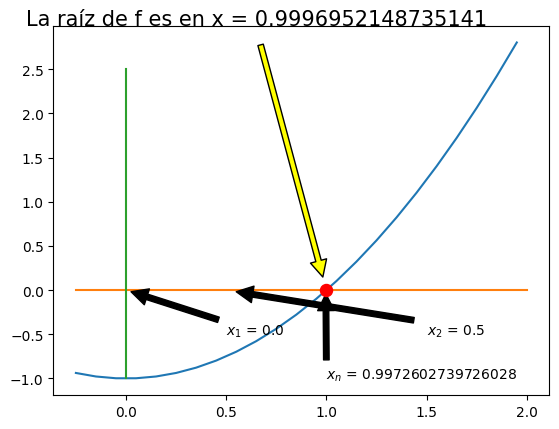

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# funcion a graficar y de la cual se busca la raiz
def f(x):
  return (x**2)-1

x = np.arange(-0.25, 2, 0.1)
fx = [f(i) for i in x]
raiz,sucesion = falsaPosicion(f,0.001,1000,-0.5,2)

fig, graf = plt.subplots()
#funcion a grficar
graf.plot(x,fx)
#ejes
graf.plot([-0.25, 2], [0, 0])
graf.plot([0, 0], [-1, 2.5])

# iteracion 1
graf.annotate('$x_1$ = '+str(sucesion[0]), xy=(sucesion[0], 0), xytext=(0.5,-0.5),
              arrowprops=dict(facecolor='black', shrink=0.05))

# iteracion 2
graf.annotate('$x_2$ = '+str(sucesion[1]), xy=(sucesion[1], 0), xytext=(1.5,-0.5),
              arrowprops=dict(facecolor='black', shrink=0.05))
# iteracion n
graf.annotate('$x_n$ = '+str(sucesion[-3]), xy=(sucesion[-3], 0), xytext=(1.0,-1.0),
              arrowprops=dict(facecolor='black', shrink=0.05))

graf.scatter([raiz],[0.], c='red',marker='o',s=75, zorder=5)
graf.annotate('La raíz de f es en x = '+str(raiz), xy=(raiz, 0), xytext=(-0.5,3.0),
              fontsize=15, arrowprops=dict(facecolor='yellow', shrink=0.05))

plt.show()

interactive(children=(IntSlider(value=1, description='iteraciones', max=10), Output()), _dom_classes=('widget-…

<function __main__.falsaGraf(iteraciones)>

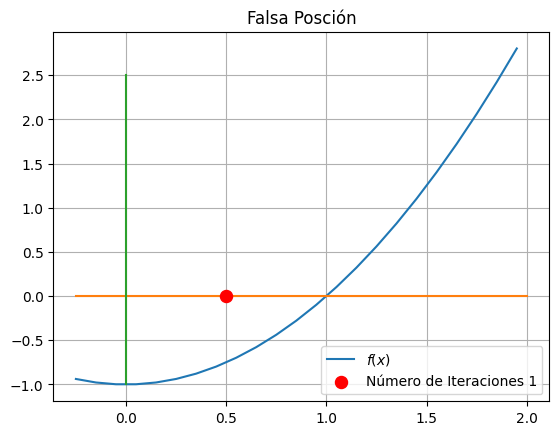

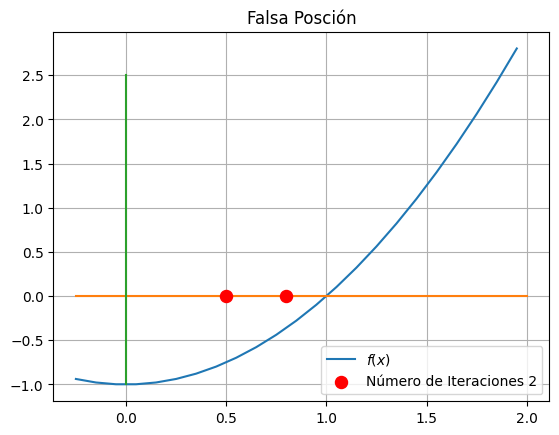

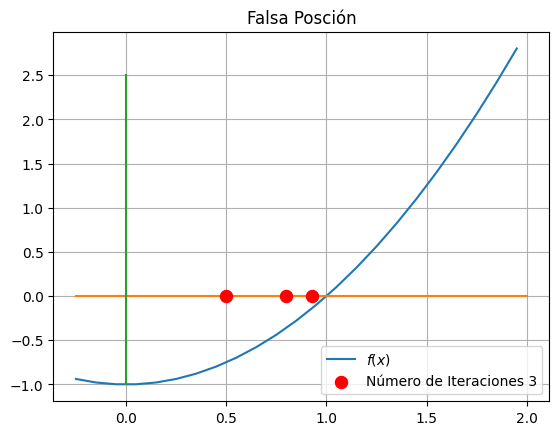

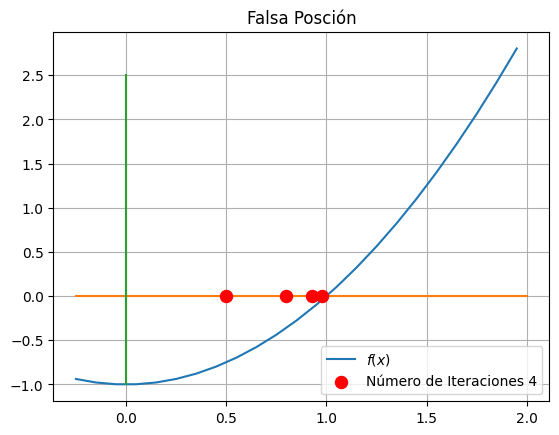

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

# funcion a graficar y de la cual se busca la raiz
def f(x):
  return (x**2)-1

def falsaGraf(iteraciones):
  # dominio en el cual se genera la grafica
  x = np.arange(-0.25, 2, 0.1)
  fx = [f(i) for i in x]
  raiz,sucesion = falsaPosicion(f,0.001,1000,0,2)
  fig, graf = plt.subplots()
  #funcion a grficar
  plt.title('Falsa Posción')
  plt.plot(x,fx, label = "$f(x)$")
  #ejes
  plt.plot([-0.25, 2], [0, 0])
  plt.plot([0, 0], [-1, 2.5])
  # constante para acotar
  plt.scatter(sucesion[:iteraciones], [0]*iteraciones, c='red',marker='o',s=75, zorder=5,
              label = "Número de Iteraciones "+str(iteraciones))
  plt.grid()
  plt.legend()

interact(falsaGraf, iteraciones=widgets.IntSlider(min=0,max=10,step=1,value=1))

### Ventajas y Desventajas

**Ventajas**.

* Si existe una raíz, este método siempre converge.

* Se aproxima a la raiz más pronto que el método de la bisección.

**Desventajas**.

* Su convergencia es muy lenta comparada con la convergencia de otros métodos, por lo que se sugiere escoger un intervalo inicial $[a,b]$, tan pequeño como sea posible.

* Es mandatario, encontrar un intervalo donde exista al menos una raíz.

## Método de la secante

El método de la secante debe su nombre a que emplea una recta secante a $f(x)$ para dar una aproximación de la raíz.

### **Descripción del método**

*  El método de la secante es un paso previo al método de Newton, este método aproxima la derivada $f'(x_{n})$ mediante la recta secante. Este método es parecido al método de la falsa posición, ya que ambos comienzan con un intervalo y se basan en la formula de la interpolación lineal.


*  Al igual que el método de la falsa posición la aproximación a la raíz $x_{n}$, se obtiene con la intersección de la recta secante a la curva que une los puntos $(x_{0},f(x_{0}))$ y $(x_{1},f(x_{1}))$ con el eje $x$ y se denota $x_{2}$, siendo esta ultima una mejor aproximación de la raíz.


*  Este proceso se repite de tal manera que para encontrar la aproximación de la raíz $x_{n}$, se emplean las aproximaciones $x_{n-1}$ y $x_{n-2}$.


*  El algoritmo termina cuando se cumplen los criterios de convergencia (2), (3) y (4).

### Algoritmo

Para poder encontrar la intersección de la recta secante con la curva que une los puntos $(x_{0},f(x_{0}))$ y $(x_{1},f(x_{1}))$, se emplea la siguiente igualdad trigonométrica, ya que la recta secante al intersectar el eje $x$ forma un ángulo $\theta$ y por tanto un par de triángulos semejantes.

$$\cot\theta=\frac{cateto\hspace{1mm} adyacente}{cateto \hspace{1mm}opuesto}$$

Posteriormente se substituyen los puntos antes mencionados en la identidad trigonométrica.

$$\cot\theta=\frac{x_{1}-x_{2}}{f(x_{1})} \quad \cot\theta=\frac{x_{1}-x_{0}}{f(x_{1})-f(x_{0})}$$

El resto del desarrollo consiste en igualar ambas ecuaciones y despejar $x_{2}$, ya que es el valor buscado, $f(x_2)=0$ ya que esperamos que $x_2$ sea una raíz de $f(x)$.

$$ \Longrightarrow \frac{x_{1}-x_{2}}{f(x_{1})}	=	\frac{x_{1}-x_{0}}{f(x_{1})-f(x_{0})}$$

$$x_{2}	=	x_{1}-f(x_{1})\frac{x_{1}-x_{0}}{f(x_{1})-f(x_{0})}$$

De manera que para obtener la n-esima intersección con el eje $x$ de la recta secante a la curva, la ecuación seria:

$$ x_{n}=x_{n-1}-f(x_{n-1})\frac{x_{n-1}-x_{n-2}}{f(x_{n-1})-f(x_{n-2})} \tag{6}$$

A la ecuación (6) se le conoce como el método iterativo del método de la secante.

<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/raicesNumericas/Secan.png?raw=1" width="500">

**Pseudocódigo**

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/raicesNumericas/algSec.PNG?raw=1" width="700">

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/raicesNumericas/esqSec.PNG?raw=1" width="700">

In [ ]:
'''Esta funcion implementa el metodo de la secante
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
x0:  aproximacion inicial
x1: aproximacion siguiente
'''
def secante(f, Tol, N, x0, x1):
    #contador de iteraciones
    n = 1
    #mientras no se haya superado el limite de iteraciones
    while( N >= n ):
        #calculo de los valores de fx
        fx0,fx1=f(x0),f(x1)
        #se calcula la siguiente aproximacion
        xn = x1-fx1*((x1-x0)/float(fx1-fx0))
        #en caso de que se cumplan los criteros de paro
        #se devuelve la raiz
        if (abs(f(xn)) <= Tol and abs(x0-x1) <= Tol):
            return xn
        #se actualizan los valores
        x0 = x1
        x1 = xn
        #incremento en las iteraciones
        n+=1
    raise Exception("Se alcanzo el maximo numero de iteraciones y no se encontro raiz")

raiz = secante(f,0.0001,10,-0.5,2)
print("La raíz con el método de la secante es:", raiz)

La raíz con el método de la secante es: 0.9999999999999999


### Ventajas y Desventajas

**Ventajas**

* No hay que calcular la derivada de $f$.

* La convergencia del método es superlineal, lo que significa que se aproxima a la raíz con un menor número de iteraciones, en comparación con los métodos previos.

**Desventajas**

* El método puede converger a una raíz no deseada o puede no converger del todo si la estimación inicial no es buena.

* Si dos aproximaciones sucesivas están demasiado cercanas, entonces también $f(x_{n+1})$ y $f(x_{n})$ están muy cercanas, por lo que se presenta un error de redondeo significativo en la siguiente aproximación, debido al redondeo y a la cancelación numérica ya que se emplea la ecuación (6).

## Método de Newton

El método de Newton hace uso de la definición de la derivada de $f(x)$ para encontrar la aproximación a la raíz de la función.


### Descripción del método

* El método de Newton comienza con una aproximación inicial $x_{0}$ a la raíz, a continuación se traza una recta tangente a la curva en el punto $\left(x_{0},\,f\left(x_{0}\right)\right)$. La intersección de la recta tangente con el eje x, se denota como $x_{1}$ y se considera una mejor aproximación de la raíz.


* Después se traza otra recta tangente a la curva en el punto $\left(x_{1},\,f\left(x_{1}\right)\right)$. La nueva intersección de la recta tangente con el eje $x$, se denota como $x_{2}$ y se considera una mejor aproximación de la raíz.


* El proceso se repite hasta que se cumplan los criterios de convergencia de las ecuaciones.


* El método de Newton, se puede aplicar para hallar raíces complejas, siempre y cuando el valor inicial $x_{0}$ sea un número complejo.

### Algoritmo

La intersección de la recta tangente con el eje $x$ se puede calcular de la siguiente manera:


$$\tan \theta	=	\frac{cateto \hspace{1mm}opuesto}{cateto\hspace{1mm}adyacente}$$

$$\tan \theta=\frac{f\left(x_{0}\right)}{x_{0}-x_{1}}=f^{'}(x_{0})$$

Se iguala a la primera derivada de $x_{0}$, ya que ésta es equivalente a la pendiente :

$$f^{'}\left(x_{0}\right) = \frac{f\left(x_{0}\right)-0}{x_{0}-x_{1}}$$

$$ \Rightarrow \frac{f\left(x_{0}\right)}{x_{0}-x_{1}} = f^{'}(x_{0})$$

$$ \left(x_{0}-x_{1}\right)f^{'}\left(x_{0}\right) = f(x_{0})$$

$$ f\left(x_{0}\right) = x_{0}f^{'}\left(x_{0}\right)-x_{1}f^{'}\left(x_{0}\right)$$

$$ x_{1}f^{'}\left(x_{0}\right) = x_{0}f^{'}\left(x_{0}\right)-f\left(x_{0}\right)$$

$$ x_{1} = x_{0}-\frac{f\left(x_{0}\right)}{f^{'}\left(x_{0}\right)}$$

**Método iterativo de Newton**

Para obtener la n-esima intersección con el eje $x$ de la recta tangente a la curva, la ecuación sería:

$$ x_{n}=x_{n-1}-\frac{f\left(x_{n-1}\right)}{f^{'}\left(x_{n-1}\right)}$$

**Pseudocódigo**

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/raicesNumericas/algNew.PNG?raw=1" width="700">

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/raicesNumericas/esqNew.PNG?raw=1" width="700">

In [ ]:
'''Esta funcion implementa el metodo de la falsa posicion
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
df:  derivada de f
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
x0:  aproximacion inicial
'''
def newton(f,df,Tol,N,x0):
    #contador de iteraciones
    n=1
    #mientras no se haya superado el limite de iteraciones
    while n<=N:
        #se evalua la funcion y su derivada
        fx=f(x0)
        dfx=df(x0)
        #se calcula la siguiente aproximacion
        xn = x0-(fx/float(dfx))
        #en caso de cumplir criterios se devuelve la raiz
        if abs(f(xn)) <= Tol and abs(xn-x0) <= Tol:
            return xn
        #actualizamos las aproximaciones
        x0 = xn
        #se incrementa el contador de iteraciones
        n=n+1
    raise Exception("Se alcanzo el maximo numero de iteraciones y no se encontro raiz")

def df(x):
    return 2*x

raiz = newton(f,df,0.0001,100,2)
print("La raíz con el método de Newton es:", raiz)

La raíz con el método de Newton es: 1.000000000000001


### Ventajas y Desventajas

**Ventajas**.

* La rapidez de convergencia iterativa del método de Newton es mayor a cualquier método visto previamente.

* Sirve para encontrar raíces complejas, para lo cual requiere que $x_0$ sea un número complejo $x_0 = a + bi$.

**Desventajas**.

* El método requiere una buena estimación inicial. De otro modo, la solución iterativa puede ser divergente o converger a una solución irrelevante.

* La derivada $f′(x)$, no siempre es fácil de calcular.

### Observaciones

Ya que la naturaleza de las funciones puede ser muy variada, hay que tomer en cuenta las siguientes observaciones:


*   Si se tiene una aproximación inicial $x_0$ en un punto de inflexión, es decir $f''(x)=0$, las aproximaciones pueden oscilar de manera indefinida.
*   Si alguna de las aproximaxiones se encuentra cerca de un máximo o un mínimo local. Una pendiente nula provoca una división entre cero en el método (geométricamente esto significa una recta tangente que nunca se intersecta con el eje $x$).
*   Si se tiene varias raíces en un intervalo cercano, puede darse el caso de que una aproximación pase de la aproximación de una raíz a otra continuamente, sin lograr la convergencia.

<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/raicesNumericas/Newton1.png?raw=1" width="500">

<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/raicesNumericas/Newton2.png?raw=1" width="500">

<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/raicesNumericas/Newton3.png?raw=1" width="500">



## Referencias

1.Riswan Butt:Numerical Analysys Using Matlab, Jones and Bartlett.

2.Ward Cheney, David Kincaid: Métodos Numéricos y Computación, Cenage Learning.

3.Richard L. Burden, J. Douglas Faires: Análisis Numérico, Math Learning.